## ***Savita's Boutique (Fashion Retail) Data Analysis Project***

As the Operational Manager and Sales Analyst at Savita's Boutique, I embarked on a comprehensive analysis of our point-of-sale data. Focused on unraveling insights, my mission is to empower decision-making and uncover trends that will elevate our business strategy. Join me in this journey through the data-driven exploration of Savita's Boutique, where every observation unveils an opportunity.


## ***AI-Driven Data Analysis***

In conducting the analysis for Savita's Boutique, I utilized my generative AI skills on the ChatGPT platform to create a virtual assistant. This AI-driven assistant streamlined the data analysis process, expediting code development and fostering a collaborative synergy between my expertise and AI capabilities.


### ***EDA: Exploratory Data Analysis***

#### **Import Libraries and Load Datsets**

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
suppliers = pd.read_csv("C:/Users/azhar/Desktop/Python/Savitas Boutique/suppliers.csv")

In [3]:
customers = pd.read_csv("C:/Users/azhar/Desktop/Python/Savitas Boutique/customers.csv")

In [4]:
suppliers.head(5)

,Transaction_id,Date,Supplier_Name,Category,Quantity,Tax,Selling_Price,Cost_Price,Gross_Profit,Discount,Supplier_Location
0,2,06-03-2022,Pehnava,Dress,1,0.0,3100,1550,1550.0,550.0,Mumbai
1,3,06-03-2022,Pehnava,Dress,1,0.0,4100,1750,2350.0,400.0,Mumbai
2,3,06-03-2022,Pehnava,Dress,1,0.0,3200,1800,1400.0,650.0,Mumbai
3,4,06-03-2022,Savita's Design,Dress,1,0.0,17500,17500,0.0,10000.0,Nashik
4,5,06-03-2022,Pehnava,Dress,1,0.0,2000,1095,905.0,550.0,Mumbai


In [5]:
customers.head(5)

,Transaction_id,Date,Customer_Name,Quantity,Tax,Selling_Price,Cost_Price,Gross_Profit
0,2,6/3/2022,Dr.Snehal Desai,1,0,3100.0,1550.0,1550.0
1,3,6/3/2022,Meena Mehta,3,0,10400.0,5100.0,5300.0
2,4,6/3/2022,Dr.Vaishali Chopra,1,0,17500.0,17500.0,0.0
3,5,6/3/2022,Leena Sapkale,2,0,4500.0,2490.0,2010.0
4,6,8/3/2022,Pranita Patil,3,0,11000.0,6195.0,4805.0


In [6]:

# Merge DataFrames based on 'Transaction_id'
merged_data = pd.merge(suppliers, customers, on='Transaction_id', how='inner')

# Select the desired columns
boutique = merged_data[['Transaction_id', 'Date_x', 'Supplier_Name', 'Category', 'Quantity_x', 'Tax_x',
                         'Selling_Price_x', 'Cost_Price_x', 'Gross_Profit_x', 'Discount', 'Supplier_Location',
                         'Customer_Name']]

# Rename columns if needed (suffixes '_x' were added due to column name conflicts)
boutique = boutique.rename(columns={'Date_x': 'Date', 'Quantity_x': 'Quantity', 'Tax_x': 'Tax',
                                      'Selling_Price_x': 'Selling_Price', 'Cost_Price_x': 'Cost_Price',
                                      'Gross_Profit_x': 'Gross_Profit'})

# Display the resulting DataFrame
boutique.head()


,Transaction_id,Date,Supplier_Name,Category,Quantity,Tax,Selling_Price,Cost_Price,Gross_Profit,Discount,Supplier_Location,Customer_Name
0,2,06-03-2022,Pehnava,Dress,1,0.0,3100,1550,1550.0,550.0,Mumbai,Dr.Snehal Desai
1,3,06-03-2022,Pehnava,Dress,1,0.0,4100,1750,2350.0,400.0,Mumbai,Meena Mehta
2,3,06-03-2022,Pehnava,Dress,1,0.0,3200,1800,1400.0,650.0,Mumbai,Meena Mehta
3,3,16-03-2022,Pehnava,Dress,1,0.0,2350,1550,800.0,750.0,Mumbai,Meena Mehta
4,4,06-03-2022,Savita's Design,Dress,1,0.0,17500,17500,0.0,10000.0,Nashik,Dr.Vaishali Chopra


In [7]:
boutique.shape

(1996, 12)

In [8]:
boutique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Transaction_id     1996 non-null   int64  
 1   Date               1996 non-null   object 
 2   Supplier_Name      1996 non-null   object 
 3   Category           1996 non-null   object 
 4   Quantity           1996 non-null   int64  
 5   Tax                1996 non-null   float64
 6   Selling_Price      1996 non-null   int64  
 7   Cost_Price         1996 non-null   int64  
 8   Gross_Profit       1996 non-null   float64
 9   Discount           1996 non-null   float64
 10  Supplier_Location  1996 non-null   object 
 11  Customer_Name      1996 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 187.2+ KB


#### **Grand Total Overview: Financial Insights**

In [9]:

# Calculate grand total
grand_total = boutique.agg({
    'Quantity': 'sum',
    'Selling_Price': 'sum',
    'Cost_Price': 'sum',
    'Discount': 'sum',
    'Tax': 'sum',
    'Gross_Profit': 'sum'
})

# Convert values to millions with two decimal points
grand_total['Selling_Price'] = round(grand_total['Selling_Price'] / 1e6, 2)
grand_total['Cost_Price'] = round(grand_total['Cost_Price'] / 1e6, 2)
grand_total['Discount'] = round(grand_total['Discount'] / 1e6, 2)
grand_total['Tax'] = round(grand_total['Tax'] / 1e6, 2)
grand_total['Gross_Profit'] = round(grand_total['Gross_Profit'] / 1e6, 2)

# Display the grand total table
print("Grand Total (Values In Million):")
print(grand_total)


Grand Total (Values In Million):
Quantity         2509.00
Selling_Price      14.44
Cost_Price          8.90
Discount            3.41
Tax                 0.14
Gross_Profit        5.62
dtype: float64


#### **Category-wise Analysis: Sales and Profits**

In [10]:

# Group data by 'Category' and aggregate metrics
category_analysis = boutique.groupby('Category').agg({
    'Quantity': 'sum',
    'Selling_Price': 'sum',
    'Gross_Profit': 'sum',
    # Add more metrics as needed
}).reset_index()

# Sort the DataFrame by total profit (or any other relevant metric)
category_analysis = category_analysis.sort_values(by='Gross_Profit', ascending=False)

# Print or display the category-wise analysis
print(category_analysis)


    Category  Quantity  Selling_Price  Gross_Profit
1      Dress      2344       13281033     5220174.1
8      Saree        64         535186      188443.0
2    Dupatta        40         270125       91716.0
5      Kurti        15          92550       37368.0
3     Ghagra         2          48175       19445.0
0   Anarkali         4          89900       18255.0
6    Palazzo         8          33403       14768.0
7       Pant        19          29976       13127.0
10       Top         6          35700       11740.0
9    Sharara         4          11380        4867.0
4    Kaftaan         3          10125        2525.0


#### **Descriptive Analysis**

In [11]:
# Select columns for descriptive analysis
selected_columns = ['Cost_Price', 'Selling_Price', 'Gross_Profit', 'Discount']

# Descriptive analysis for selected columns
descriptive_stats = boutique[selected_columns].describe()

# Display the descriptive statistics
print(descriptive_stats)


         Cost_Price  Selling_Price  Gross_Profit      Discount
count   1996.000000    1996.000000   1996.000000   1996.000000
mean    4457.852705    7233.242986   2816.847745   1708.135656
std     5164.162459    7596.126999   3008.171406   2276.712766
min      475.000000     950.000000      0.000000      0.000000
25%     1698.750000    3195.000000   1264.250000    350.000000
50%     2750.000000    4950.000000   1973.000000   1000.000000
75%     5000.000000    8425.000000   3426.250000   2100.000000
max    62000.000000  109175.000000  46089.000000  24405.769230


#### **Create New Column for Price Ranges (Low, Medium and High)**

In [12]:

# Calculate the quantiles for cost price
low_quantile = boutique['Cost_Price'].quantile(0.5)
medium_quantile_lower = boutique['Cost_Price'].quantile(0.5)
medium_quantile_upper = boutique['Cost_Price'].quantile(0.75)

# Create a new column 'Price_Range' based on cost price quantiles
boutique['Price_Range'] = pd.cut(
    boutique['Cost_Price'],
    bins=[-float('inf'), low_quantile, medium_quantile_upper, float('inf')],
    labels=['Low', 'Medium', 'High'],
    include_lowest=True
)

# Display the first few rows of the DataFrame with the new 'Price_Range' column
boutique.head()


,Transaction_id,Date,Supplier_Name,Category,Quantity,Tax,Selling_Price,Cost_Price,Gross_Profit,Discount,Supplier_Location,Customer_Name,Price_Range
0,2,06-03-2022,Pehnava,Dress,1,0.0,3100,1550,1550.0,550.0,Mumbai,Dr.Snehal Desai,Low
1,3,06-03-2022,Pehnava,Dress,1,0.0,4100,1750,2350.0,400.0,Mumbai,Meena Mehta,Low
2,3,06-03-2022,Pehnava,Dress,1,0.0,3200,1800,1400.0,650.0,Mumbai,Meena Mehta,Low
3,3,16-03-2022,Pehnava,Dress,1,0.0,2350,1550,800.0,750.0,Mumbai,Meena Mehta,Low
4,4,06-03-2022,Savita's Design,Dress,1,0.0,17500,17500,0.0,10000.0,Nashik,Dr.Vaishali Chopra,High


In [13]:
# Import necessary libraries
import pandas as pd

# Assuming 'boutique' DataFrame is already created
# If not, you can merge the 'Supplier' and 'Customer' DataFrames on 'Transaction_id'

# Display basic information about the DataFrame
boutique.info()

# Check for missing values
boutique.isnull().sum()

# Display the first few rows of the DataFrame
boutique.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Transaction_id     1996 non-null   int64   
 1   Date               1996 non-null   object  
 2   Supplier_Name      1996 non-null   object  
 3   Category           1996 non-null   object  
 4   Quantity           1996 non-null   int64   
 5   Tax                1996 non-null   float64 
 6   Selling_Price      1996 non-null   int64   
 7   Cost_Price         1996 non-null   int64   
 8   Gross_Profit       1996 non-null   float64 
 9   Discount           1996 non-null   float64 
 10  Supplier_Location  1996 non-null   object  
 11  Customer_Name      1996 non-null   object  
 12  Price_Range        1996 non-null   category
dtypes: category(1), float64(3), int64(4), object(5)
memory usage: 189.3+ KB


,Transaction_id,Date,Supplier_Name,Category,Quantity,Tax,Selling_Price,Cost_Price,Gross_Profit,Discount,Supplier_Location,Customer_Name,Price_Range
0,2,06-03-2022,Pehnava,Dress,1,0.0,3100,1550,1550.0,550.0,Mumbai,Dr.Snehal Desai,Low
1,3,06-03-2022,Pehnava,Dress,1,0.0,4100,1750,2350.0,400.0,Mumbai,Meena Mehta,Low
2,3,06-03-2022,Pehnava,Dress,1,0.0,3200,1800,1400.0,650.0,Mumbai,Meena Mehta,Low
3,3,16-03-2022,Pehnava,Dress,1,0.0,2350,1550,800.0,750.0,Mumbai,Meena Mehta,Low
4,4,06-03-2022,Savita's Design,Dress,1,0.0,17500,17500,0.0,10000.0,Nashik,Dr.Vaishali Chopra,High


In [14]:
boutique.describe()

,Transaction_id,Quantity,Tax,Selling_Price,Cost_Price,Gross_Profit,Discount
count,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000
mean,457.817134,1.257014,68.035521,7233.242986,4457.852705,2816.847745,1708.135656
std,251.215466,0.954911,74.507109,7596.126999,5164.162459,3008.171406,2276.712766
min,2.000000,1.000000,0.000000,950.000000,475.000000,0.000000,0.000000
25%,239.750000,1.000000,30.000000,3195.000000,1698.750000,1264.250000,350.000000
50%,475.000000,1.000000,47.000000,4950.000000,2750.000000,1973.000000,1000.000000
75%,678.000000,1.000000,80.000000,8425.000000,5000.000000,3426.250000,2100.000000
max,842.000000,19.000000,1086.000000,109175.000000,62000.000000,46089.000000,24405.769230


In [15]:
# Convert 'Date' column to datetime data type
boutique['Date'] = pd.to_datetime(boutique['Date'], format='%d-%m-%Y')

# Confirm the conversion
boutique.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Transaction_id     1996 non-null   int64         
 1   Date               1996 non-null   datetime64[ns]
 2   Supplier_Name      1996 non-null   object        
 3   Category           1996 non-null   object        
 4   Quantity           1996 non-null   int64         
 5   Tax                1996 non-null   float64       
 6   Selling_Price      1996 non-null   int64         
 7   Cost_Price         1996 non-null   int64         
 8   Gross_Profit       1996 non-null   float64       
 9   Discount           1996 non-null   float64       
 10  Supplier_Location  1996 non-null   object        
 11  Customer_Name      1996 non-null   object        
 12  Price_Range        1996 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(3), int64(4), object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


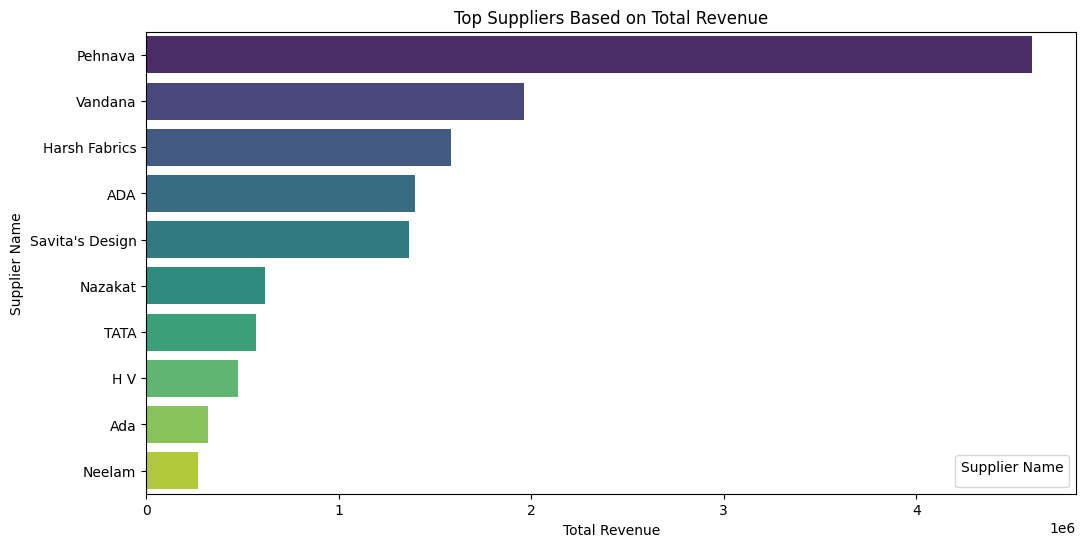

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify top suppliers based on total revenue
top_suppliers = boutique.groupby('Supplier_Name')['Selling_Price'].sum().sort_values(ascending=False).head(10)

# Plot the top suppliers with 'Supplier_Name' as hue
plt.figure(figsize=(12, 6))
sns.barplot(x=top_suppliers.values, y=top_suppliers.index, hue=top_suppliers.index, palette='viridis', dodge=False)
plt.title('Top Suppliers Based on Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Supplier Name')
plt.legend(title='Supplier Name')  # Assign a title to the legend
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


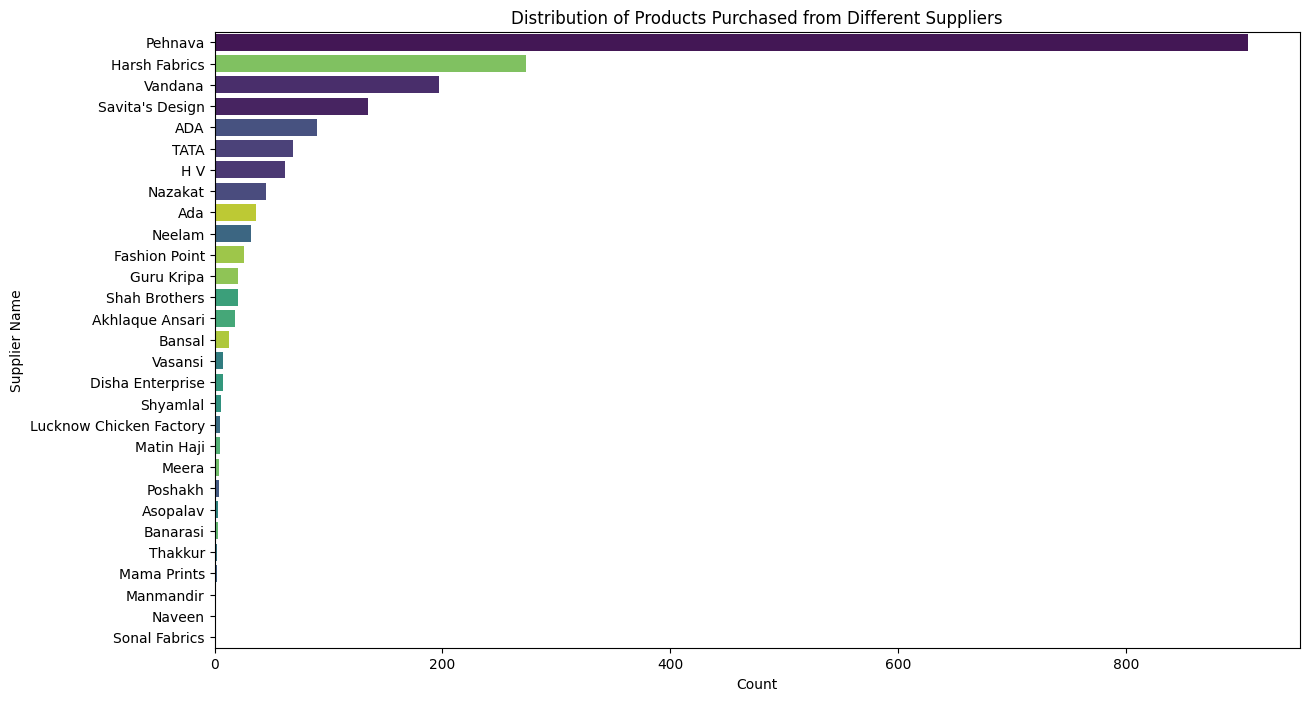

In [17]:
# Distribution of products purchased from different suppliers
plt.figure(figsize=(14, 8))
sns.countplot(y='Supplier_Name', data=boutique, order=boutique['Supplier_Name'].value_counts().index, hue='Supplier_Name', palette='viridis', dodge=False)
plt.title('Distribution of Products Purchased from Different Suppliers')
plt.xlabel('Count')
plt.ylabel('Supplier Name')
plt.legend(title='Supplier Name').remove()  # Remove the legend to address the warning
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


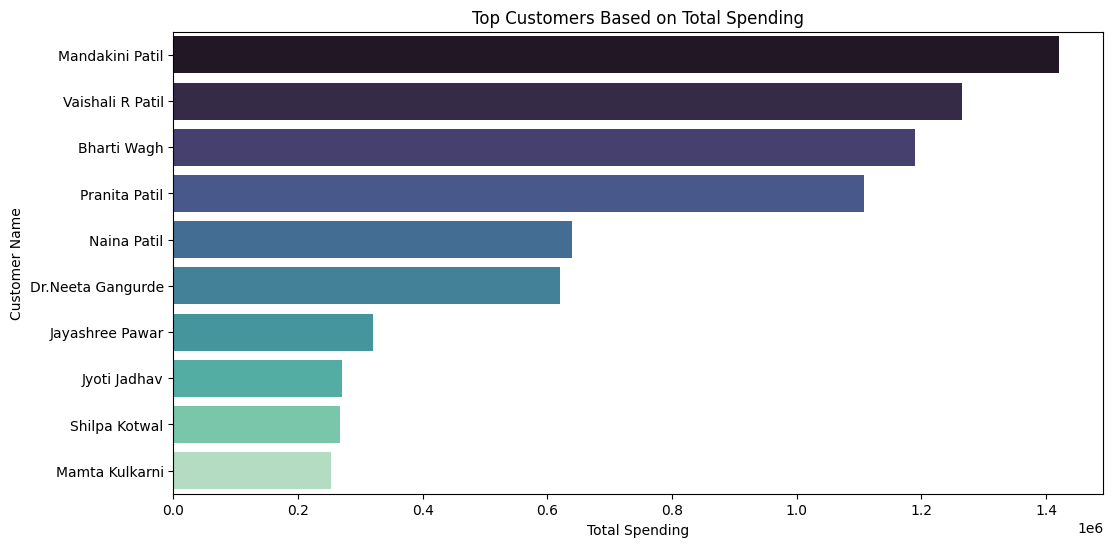

In [18]:
# Identify top customers based on total spending
top_customers = boutique.groupby('Customer_Name')['Selling_Price'].sum().sort_values(ascending=False).head(10)

# Plot the top customers
plt.figure(figsize=(12, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, hue=top_customers.index, palette='mako', dodge=False)
plt.title('Top Customers Based on Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Customer Name')
plt.legend(title='Customer Name').remove()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


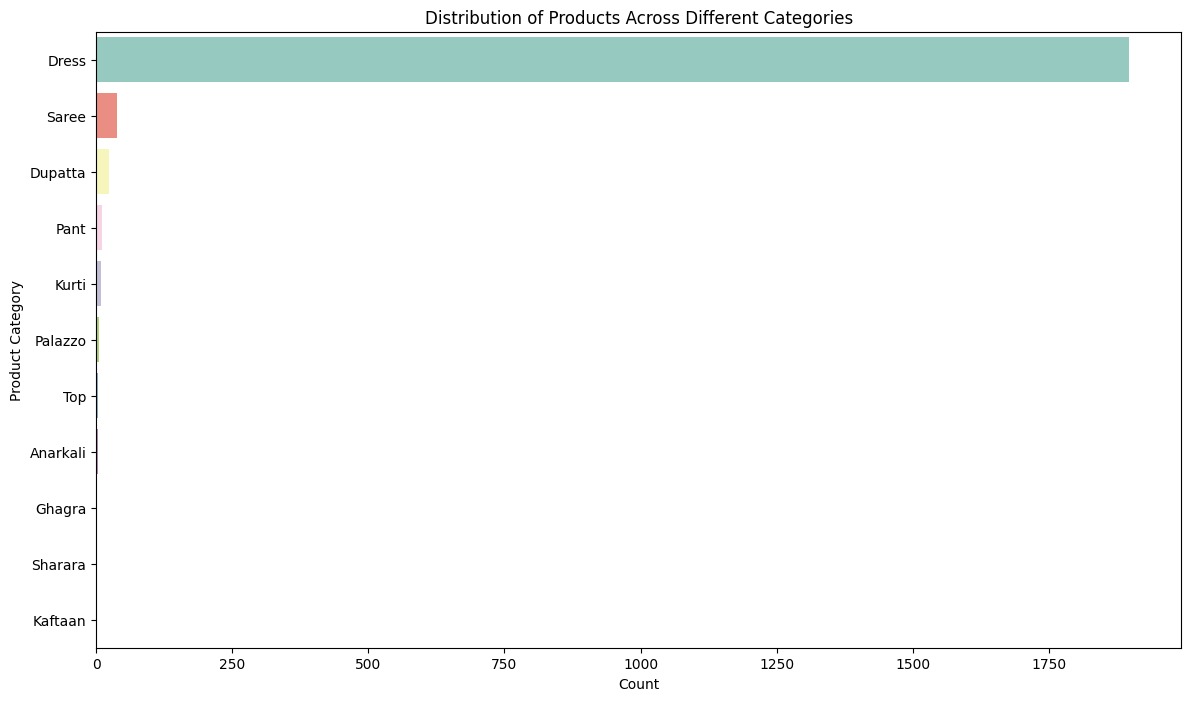

In [19]:
# Distribution of products across different categories
plt.figure(figsize=(14, 8))
sns.countplot(y='Category', data=boutique, order=boutique['Category'].value_counts().index, hue='Category', palette='Set3', dodge=False)
plt.title('Distribution of Products Across Different Categories')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.legend(title='Product Category').remove()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


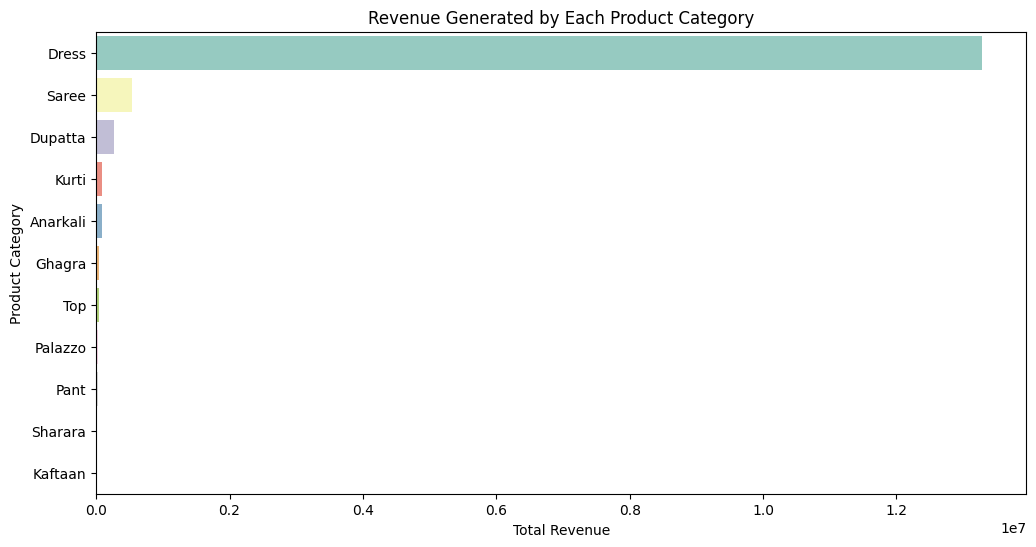

In [20]:
# Revenue generated by each product category
category_revenue = boutique.groupby('Category')['Selling_Price'].sum().sort_values(ascending=False)

# Plot the revenue by product category
plt.figure(figsize=(12, 6))
sns.barplot(x=category_revenue.values, y=category_revenue.index, hue=category_revenue.index, palette='Set3', dodge=False)
plt.title('Revenue Generated by Each Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.legend(title='Product Category').remove()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


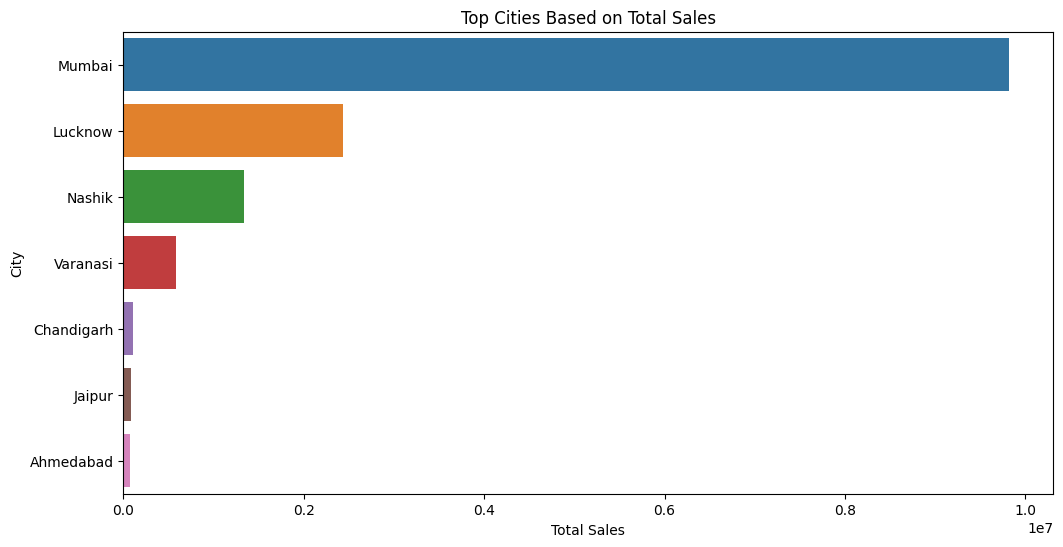

In [21]:
# Identify cities with the highest sales
top_cities = boutique.groupby('Supplier_Location')['Selling_Price'].sum().sort_values(ascending=False)

# Plot the top cities
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, hue=top_cities.index, palette='tab10', dodge=False)
plt.title('Top Cities Based on Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.legend(title='City').remove()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


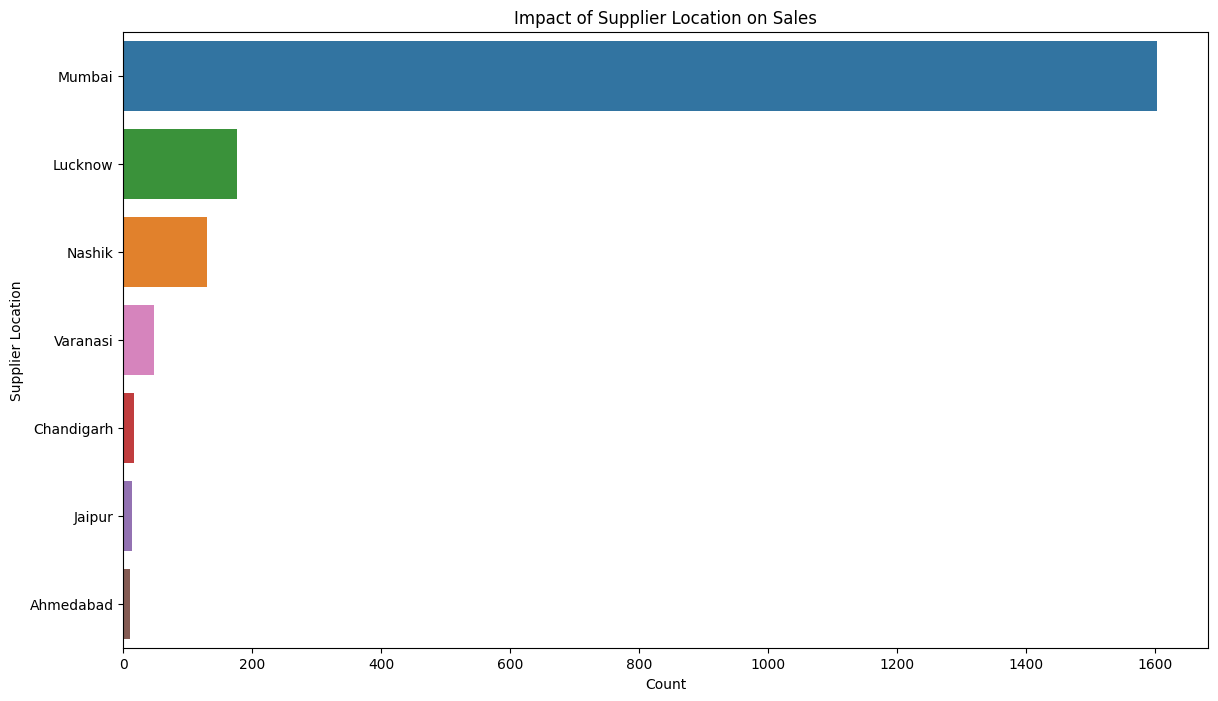

In [22]:
# Impact of supplier location on sales
plt.figure(figsize=(14, 8))
sns.countplot(y='Supplier_Location', data=boutique, order=boutique['Supplier_Location'].value_counts().index, hue='Supplier_Location', palette='tab10', dodge=False)
plt.title('Impact of Supplier Location on Sales')
plt.xlabel('Count')
plt.ylabel('Supplier Location')
plt.legend(title='Supplier Location').remove()
plt.show()


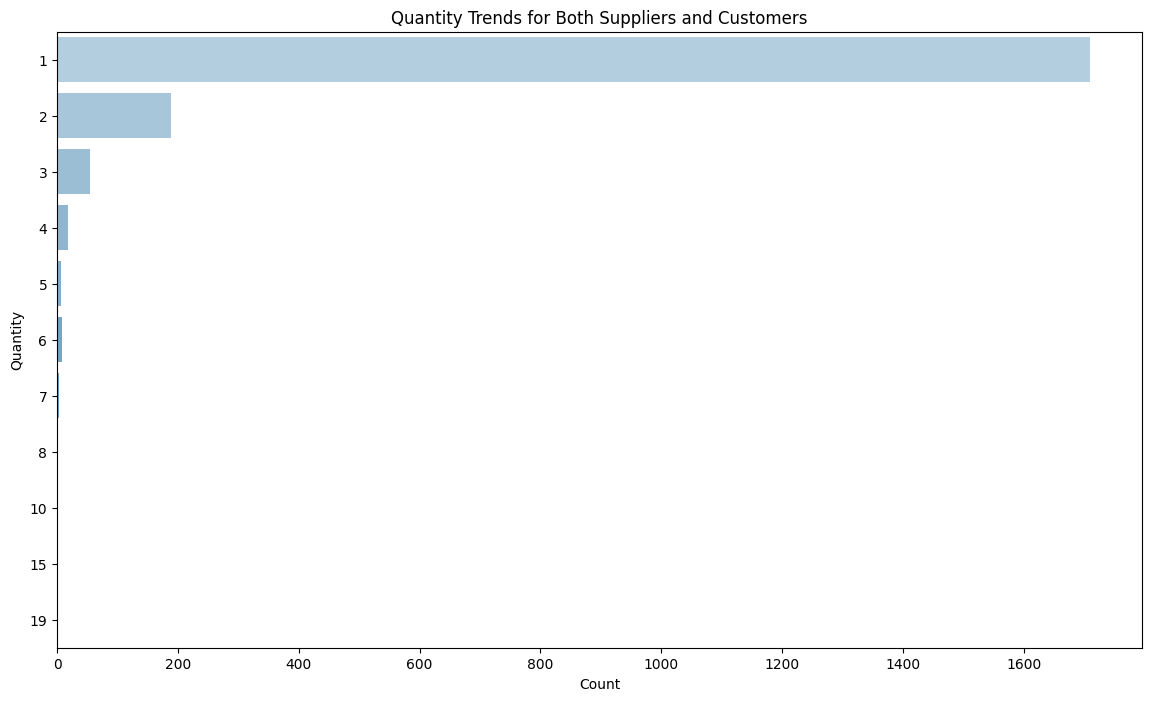

In [23]:
# Quantity trends for both suppliers and customers
plt.figure(figsize=(14, 8))
sns.countplot(y='Quantity', data=boutique, hue='Quantity', palette='Blues_d', dodge=False)
plt.title('Quantity Trends for Both Suppliers and Customers')
plt.xlabel('Count')
plt.ylabel('Quantity')
plt.legend(title='Quantity').remove()
plt.show()


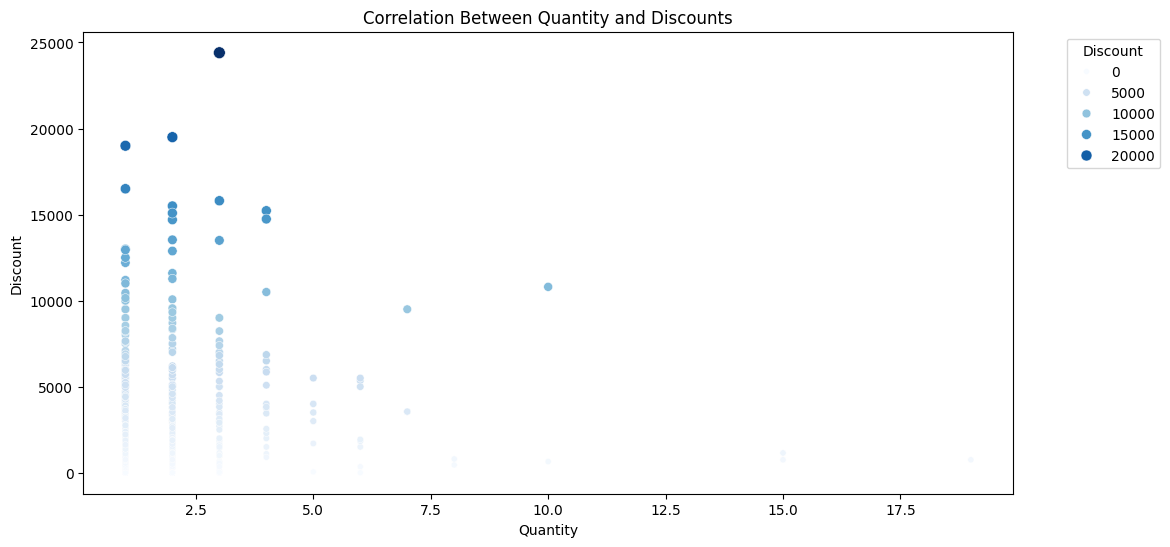

In [24]:
# Explore potential correlations between quantity and discounts
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Quantity', y='Discount', data=boutique, hue='Discount', palette='Blues', size='Discount')
plt.title('Correlation Between Quantity and Discounts')
plt.xlabel('Quantity')
plt.ylabel('Discount')
plt.legend(title='Discount', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


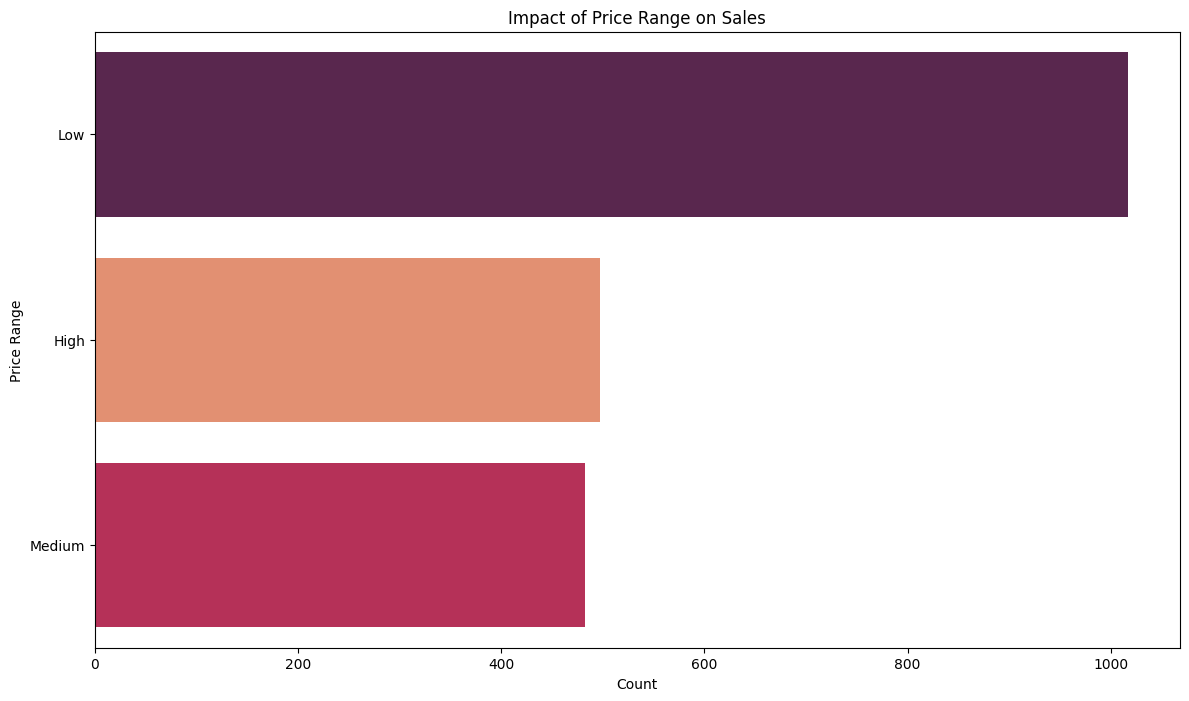

In [25]:
# Explore the impact of 'Price_Range' on sales
plt.figure(figsize=(14, 8))
sns.countplot(y='Price_Range', data=boutique, order=boutique['Price_Range'].value_counts().index, hue='Price_Range', palette='rocket', dodge=False)
plt.title('Impact of Price Range on Sales')
plt.xlabel('Count')
plt.ylabel('Price Range')
plt.legend(title='Price Range').remove()
plt.show()


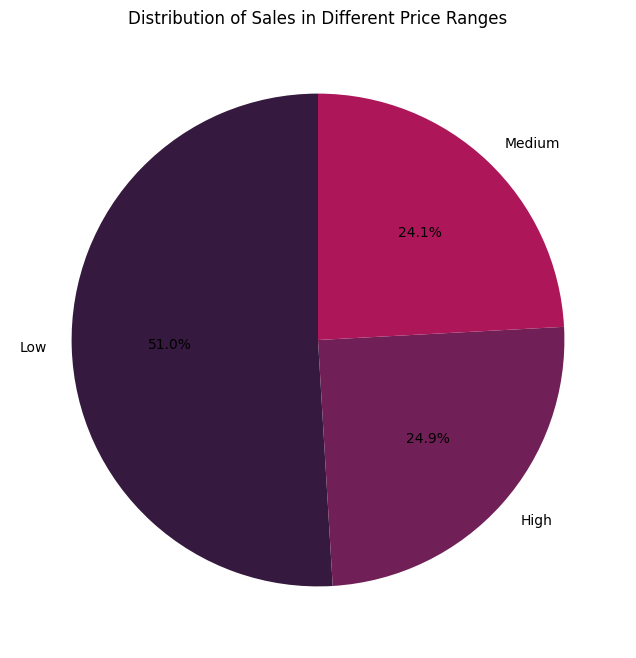

In [26]:
# Visualize the distribution of sales in different price ranges
plt.figure(figsize=(8, 8))
sales_distribution = boutique['Price_Range'].value_counts()
plt.pie(sales_distribution, labels=sales_distribution.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('rocket'))
plt.title('Distribution of Sales in Different Price Ranges')
plt.show()


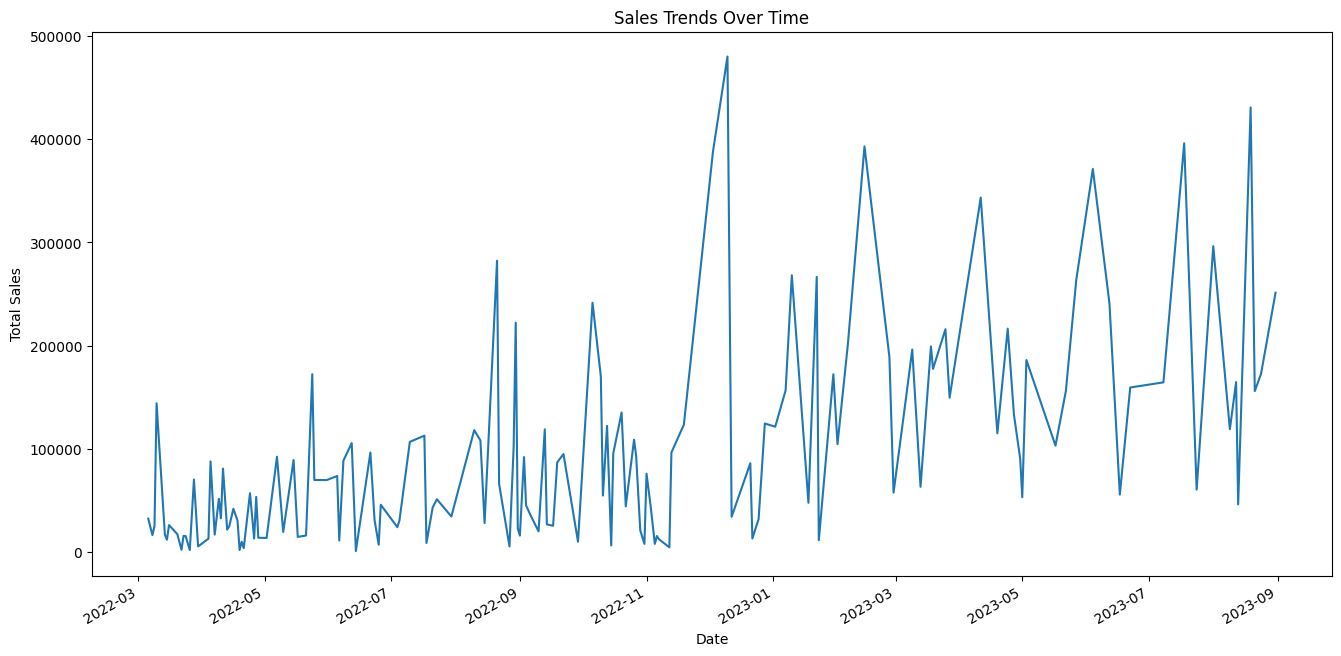

In [27]:
# Analyze sales trends over time
plt.figure(figsize=(16, 8))
sales_over_time = boutique.groupby('Date')['Selling_Price'].sum()
sales_over_time.plot()
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


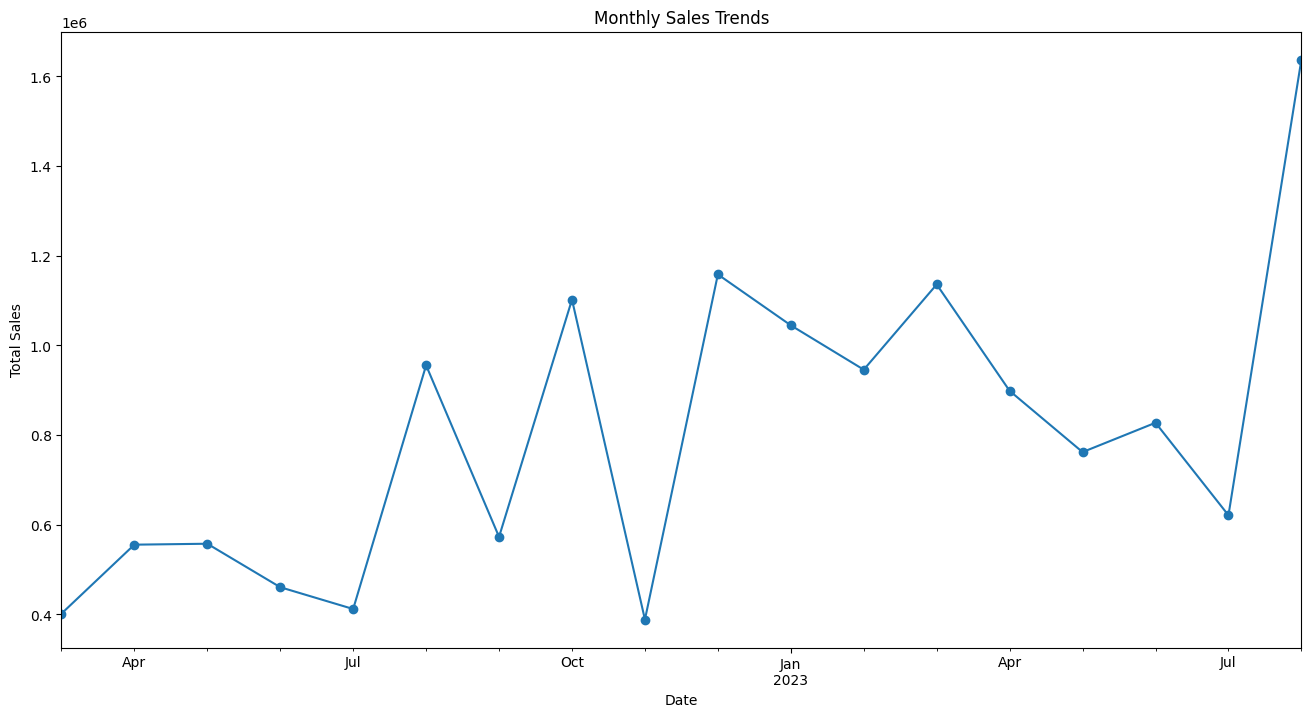

In [28]:
# Identify peak sales periods and potential seasonality
plt.figure(figsize=(16, 8))
sales_over_time.resample('M').sum().plot(marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()


### **Thank You**